In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *

from mpl_toolkits.basemap import Basemap

import networkx as nx

<h1>Working with Spatial Data and Networks Lab</h1>

<h3>Shapefile</h3>

A shapefile actually consists of three files with different extensions. Each of these contains different information about the objects that are in the file. Which file contains a dataset containing information about the shapes? Write the file extension (three letters, with or without the leading dot, e.g. "txt" or ".txt").

The answer is ".dbf" - see <a href="https://en.wikipedia.org/wiki/Shapefile">Wikipedia</a>

<h3>Choice of Algorithms</h3>

Which of the following algorithms best matches the following description? "Given a set of points P and a number k, the algorithm separates the points into k different clusters. Each point from P is assigned a unique cluster." Fun side note: All these algorithms start with "k" and are related to spatial data processing :)

The answer is "K-means" - see <a href="https://en.wikipedia.org/wiki/K-means_clustering">Wikipedia</a>

<h3>Coordinate Conversion</h3>

The code below draws a map of Bulgaria. On it, we need to draw a dot where Sofia is, using the coordinates given in the variable "sofia". To do this, we need to convert them to Cartesian coordinates. The function call contains two unknown parameters, replaced by "???". They both should reference the "sofia" variable. What is the value of the first parameter?

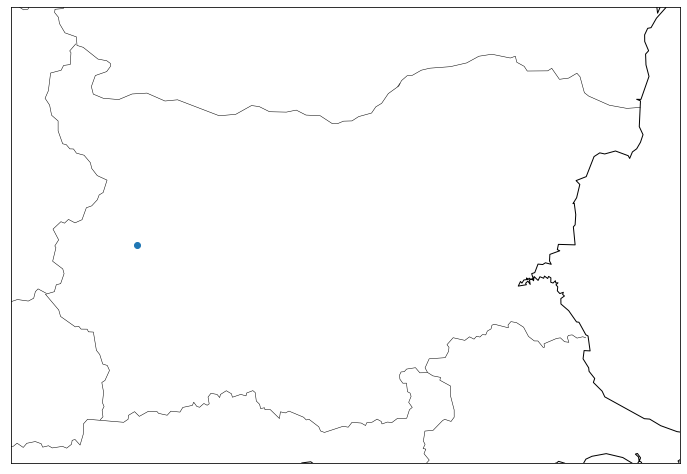

In [3]:
sofia = {"lat": 42.6977, "lng": 23.3219}
plt.figure(figsize = (12, 10))
m = Basemap(projection = "merc", llcrnrlat = 41, llcrnrlon = 22, urcrnrlat = 44.5, urcrnrlon = 29, resolution = "i")
m.drawcoastlines()
m.drawcountries()

x, y = m(sofia["lng"], sofia["lat"])
m.plot(x, y, "o")

plt.show()

<h3>Florentine Families</h3>

One famous graph in social network analysis is the "Florentine families" graph. It is implemented by default in networkx. Each node represents a family, each edge - a marital relationship (i.e. someone from family A married someone from family B). Since marriage is mutual (at least, it should be :D), the graph is undirected. Load it (and visualize it if you want). How many nodes does the shortest path from Pazzi to Peruzzi contain, including the starting and the final one?

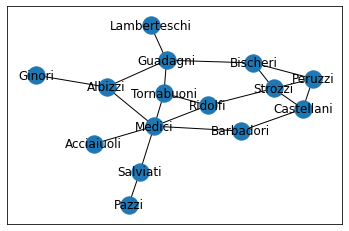

In [4]:
florentine_families = nx.florentine_families_graph()
nx.draw_networkx(florentine_families, with_labels = True)
plt.show()

In [5]:
nx.shortest_path(florentine_families, "Pazzi", "Peruzzi")

['Pazzi', 'Salviati', 'Medici', 'Barbadori', 'Castellani', 'Peruzzi']

In [6]:
len(nx.shortest_path(florentine_families, "Pazzi", "Peruzzi"))

6

<h3>A Famous Family</h3>

What is the name of the most important / famous family in this graph? Use code to see this, not your imagination :D.

In [7]:
centrality = nx.betweenness_centrality(florentine_families)
key_list = list(centrality.keys())
val_list = list(centrality.values())
position = val_list.index(max(val_list))
print(key_list[position])

Medici


<h3>Searching in Graphs</h3>

The most popular (and arguably, easiest to implement) algorithms in graphs involve traversing. The problem is stated like this: given a graph G and a starting node S, explore all nodes connected (directly or not) to S. The two most common ways of graph traversal are depth-first search (DFS) and breadth-first search (BFS). You can look them up on the internet. Let's now imagine another problem: finding a shortest path between two nodes. We already saw (many times) how it works. More formally, given a graph G, a start node S, and an end node P, find a path from S to P which has minimal length (i.e. minimal number of edges). We can solve this new problem by adapting one of the previous algorithms. Which traversal algorithm can we adapt to find a shortest path?

Answer - Both.